In [15]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from imp import reload
import sys
import seaborn as sns
sys.path.append("../src/chapter11/")
import freeman_code

sns.set_style("darkgrid")
import seaborn as sns

%matplotlib inline

img_base_path = r"../image_data/DIP3E_CH11_Original_Images/"

# 表示

## Moore边界追踪

## Freeman链码

计算Freeman链码的步骤如下：
1. 获取Freeman网格线对应的坐标，x和y轴分别为x_freeman_list,y_freeman_list
2. 遍历边界的每个点，如果该点在freeman网格线上，执行如下步骤：
    * 判断该线是横线还是竖线
    * 算出该点在线中心的方向（上下左右），然后找出最邻近的Freeman坐标
    * 从最左面的点开始，顺时针扫描Freeman坐标上的点，根据方向判断链码

(570, 570)


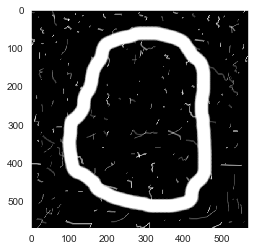

In [2]:
img_path = os.path.join(img_base_path,"Fig1105(a)(noisy_stroke).tif")
img = Image.open(img_path)
img = np.asarray(img)

print(img.shape)

plt.imshow(img,cmap="gray")

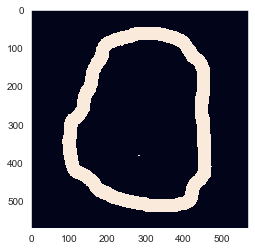

In [3]:
tmp_img = cv2.blur(img,(9,9))
th,tmp_img = cv2.threshold(tmp_img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(tmp_img)
plt.show()

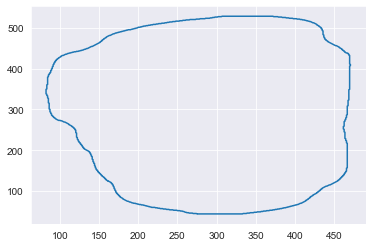

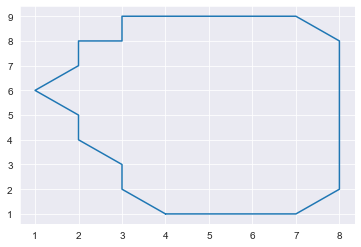

In [10]:
black_img = np.zeros_like(img)

# plt.imshow(cv2.findContours(black_img,contours,1,[255,255,255],2))

tmp_img = cv2.blur(img, (9, 9))
th, tmp_img = cv2.threshold(
    tmp_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
image, contours, hierarchy = cv2.findContours(
    tmp_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contour = contours[-1]
contour = np.reshape(contour, (contour.shape[0], contour.shape[-1]))
x = [i[0] for i in contour]
y = [i[1] for i in contour]
plt.plot(x, y)
plt.show()

r = freeman_code.get_freeman_coordination(tmp_img, contour)

x = [i[0] for i in r]
y = [i[1] for i in r]

plt.plot(x,y)


# plt.imshow(cv2.drawContours(black_img,contours,1,[22,255,255],2))

## 标记图

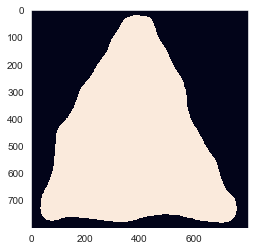

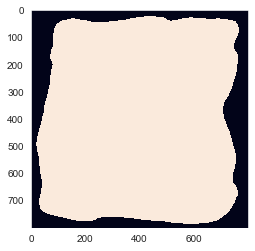

In [10]:
sns.set_style("dark")

img1_path = os.path.join(img_base_path,"Fig1111(a)(triangle).tif")
img1 = Image.open(img1_path)
img1 = np.asarray(img1)
img1 = img1.astype(np.uint8)

img2_path = os.path.join(img_base_path,r"Fig1111(b)(square).tif")
img2 = Image.open(img2_path)
img2 = np.asarray(img2)
img2 = img2.astype(np.uint8)

plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

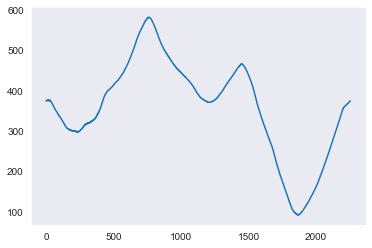

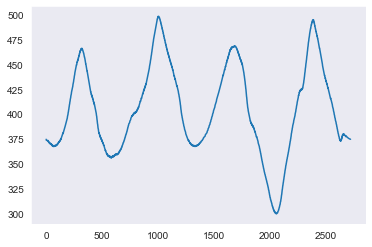

In [11]:
import mark_sheet

distances = mark_sheet.get_mark_sheet(img1)
plt.plot(distances)
plt.show()

distances = mark_sheet.get_mark_sheet(img2)
plt.plot(distances)
plt.show()

## 骨架

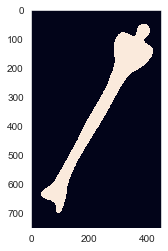

In [18]:
img = Image.open(os.path.join(img_base_path,r"Fig1116(leg_bone).tif"))
img = np.asarray(img)
sns.set_style("dark")

plt.imshow(img)

In [21]:
import mat

skeleton_img = mat.get_img_skeleton_by_mat(img)

正在执行MAT算法的第1轮
正在执行MAT算法的第2轮
正在执行MAT算法的第3轮
正在执行MAT算法的第4轮
正在执行MAT算法的第5轮
正在执行MAT算法的第6轮
正在执行MAT算法的第7轮
正在执行MAT算法的第8轮
正在执行MAT算法的第9轮
正在执行MAT算法的第10轮
正在执行MAT算法的第11轮
正在执行MAT算法的第12轮
正在执行MAT算法的第13轮
正在执行MAT算法的第14轮
正在执行MAT算法的第15轮
正在执行MAT算法的第16轮
正在执行MAT算法的第17轮
正在执行MAT算法的第18轮
正在执行MAT算法的第19轮
正在执行MAT算法的第20轮
正在执行MAT算法的第21轮
正在执行MAT算法的第22轮
正在执行MAT算法的第23轮
正在执行MAT算法的第24轮
正在执行MAT算法的第25轮
正在执行MAT算法的第26轮
正在执行MAT算法的第27轮
正在执行MAT算法的第28轮
正在执行MAT算法的第29轮
正在执行MAT算法的第30轮
正在执行MAT算法的第31轮
正在执行MAT算法的第32轮
正在执行MAT算法的第33轮
正在执行MAT算法的第34轮
正在执行MAT算法的第35轮
正在执行MAT算法的第36轮
正在执行MAT算法的第37轮
正在执行MAT算法的第38轮
正在执行MAT算法的第39轮
正在执行MAT算法的第40轮
正在执行MAT算法的第41轮
正在执行MAT算法的第42轮
正在执行MAT算法的第43轮
正在执行MAT算法的第44轮
正在执行MAT算法的第45轮
正在执行MAT算法的第46轮
正在执行MAT算法的第47轮
正在执行MAT算法的第48轮
正在执行MAT算法的第49轮
正在执行MAT算法的第50轮
正在执行MAT算法的第51轮
正在执行MAT算法的第52轮
正在执行MAT算法的第53轮
正在执行MAT算法的第54轮
正在执行MAT算法的第55轮
正在执行MAT算法的第56轮
正在执行MAT算法的第57轮
正在执行MAT算法的第58轮


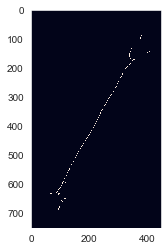

In [22]:
plt.imshow(skeleton_img)

## 形状数

## 纹理

## 不变矩

## 主成分

3


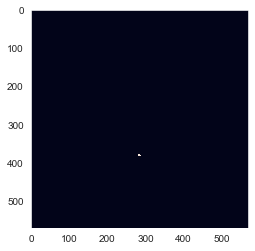

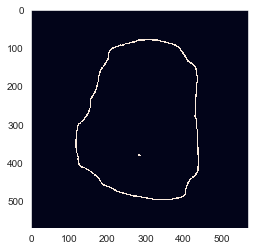

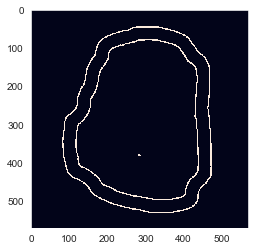

In [4]:
image,contours, hierarchy = cv2.findContours(tmp_img,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
# plt.imshow()
print(len(contours))
black_img = np.zeros_like(img)

for i in range(len(contours)):
    plt.imshow(cv2.drawContours(black_img,contours,i,[22,255,255],2))
    plt.show()

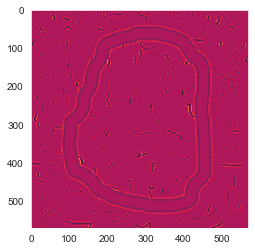

In [20]:
t_img = cv2.blur(img,(5,5))
t_img = cv2.Laplacian(t_img,3)
plt.imshow(t_img,)